# Generic Gradient Descent

## Step 0: Create the dataset

In [18]:
import numpy as np
MEN_SAMPLE_SIZE = 200
WOMEN_SAMPLE_SIZE = 200
def generate_data(MEN_SAMPLE_SIZE, WOMEN_SAMPLE_SIZE):


    salaries_men = np.random.gamma(3,2,MEN_SAMPLE_SIZE)
    salaries_women = np.random.gamma(1.4, 1, WOMEN_SAMPLE_SIZE)
    salaries = np.append(salaries_men, salaries_women)

    age_men = np.random.normal(4,1, MEN_SAMPLE_SIZE)
    age_women = np.random.normal(3.2, 2, WOMEN_SAMPLE_SIZE)
    age = np.append(age_men, age_women)

    weight_men = np.random.normal(4, 2, MEN_SAMPLE_SIZE)
    weight_women = np.random.normal(2.8, 2, WOMEN_SAMPLE_SIZE)
    weight = np.append(weight_men, weight_women)

    scores_women = np.random.gamma(4,2, WOMEN_SAMPLE_SIZE)
    scores_men = np.random.gamma(4,1, MEN_SAMPLE_SIZE)
    scores = np.append(scores_men, scores_women)

    bias = np.ones(WOMEN_SAMPLE_SIZE + MEN_SAMPLE_SIZE)
    
    feature_names = ["age", "weight", "scores", "bias"]
    features = np.column_stack((age, weight, scores, bias)).T
    assert np.shape(features) == (4, MEN_SAMPLE_SIZE + WOMEN_SAMPLE_SIZE)
    assert np.shape(salaries) == (MEN_SAMPLE_SIZE + WOMEN_SAMPLE_SIZE, )
    return features, salaries, feature_names

features, salaries, feature_names = generate_data(MEN_SAMPLE_SIZE, WOMEN_SAMPLE_SIZE)

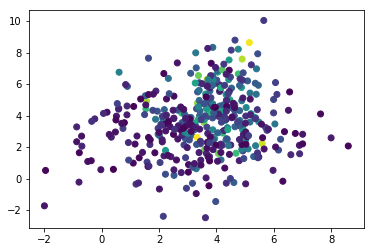

In [19]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(features[0,:], features[1, :], c=salaries)

The general algorithm for Gradient Descent is as follows:

![here](gradient_descent_basic.png)

The gradient for the **Mean Square Error** loss function is

![here](gradient_descent.png)

## Step 1: Initialize $w_0$

In [20]:
weight_vector = np.random.normal(0, 1, len(feature_names))

In [21]:
STOPPING_THRESHOLD = 0.001
LEARNING_RATE = 0.01

The gradient for the loss function can be found as

\begin{equation}
MSE = \frac{1}{N}\sum_{i=0}^{N-1}(w^Tx_i - y_i)^2
\end{equation}

\begin{equation}
\frac{\partial MSE}{\partial w} = \frac{2}{N}\sum_{i=0}^{N-1}(w^Tx_i - y_i)(x_i)
\end{equation}

where $N$ is the total number of data points in the dataset.

In [22]:
def generate_predictions(w, x):
    return w.T.dot(x)

In [23]:
y_preds = generate_predictions(weight_vector, features)

In [24]:
def calculate_error(w, x, y):
    return np.sum((generate_predictions(w, x) - y) **2) / (MEN_SAMPLE_SIZE + WOMEN_SAMPLE_SIZE) 

In [25]:
calculate_error(weight_vector, features, salaries)

59.712181542196269

In [26]:
def calculate_gradient(w, x, y):
    return np.sum((generate_predictions(w, x) - y) * x, axis=1) /  (MEN_SAMPLE_SIZE + WOMEN_SAMPLE_SIZE) 

In [27]:
gradients = calculate_gradient(weight_vector, features, salaries)

Now we write a function to update the weights, according to the update equation of Gradient Descent:

\begin{equation}
w_{new} = w_{old} - \eta \nabla J(w,x,y)
\end{equation}

\begin{equation}
\eta = learning rate
\end{equation}

\begin{equation}
\nabla J(w,x,y) = \frac{\partial J}{\partial w}
\end{equation}


In [28]:
def update_weights(original_weights, gradients, learning_rate):
    return original_weights - learning_rate * gradients

In [29]:
weight_vector = update_weights(weight_vector, gradients, LEARNING_RATE)

In [30]:
costs = []
while True:
    costs.append(calculate_error(weight_vector, features, salaries))
    gradients = calculate_gradient(weight_vector, features, salaries)
    weight_vector = update_weights(weight_vector, gradients, LEARNING_RATE)
    if np.abs(np.sum(gradients)) < STOPPING_THRESHOLD:
        break

Text(0,0.5,'MSE')

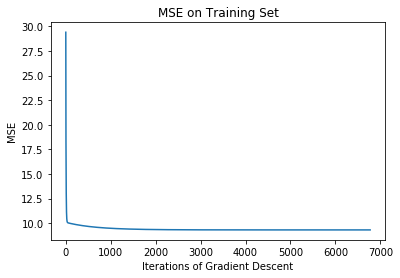

In [31]:
plt.plot(costs)
plt.title(f"MSE on Training Set")
plt.xlabel("Iterations of Gradient Descent")
plt.ylabel("MSE")

In [32]:
validation_features, validation_salaries, _ = generate_data(MEN_SAMPLE_SIZE, WOMEN_SAMPLE_SIZE)

In [37]:
iterations = 0
costs = []
validation_costs = []
weight_vector = np.random.normal(0, 1, len(feature_names)) # reinitialize weights
while True:
    iterations += 1
    costs.append(calculate_error(weight_vector, features, salaries))
    validation_costs.append(calculate_error(weight_vector, validation_features, validation_salaries))
    gradients = calculate_gradient(weight_vector, features, salaries)
    weight_vector = update_weights(weight_vector, gradients, LEARNING_RATE)
    if np.abs(np.sum(gradients)) < STOPPING_THRESHOLD or iterations == 50:
        break

Text(0,0.5,'MSE')

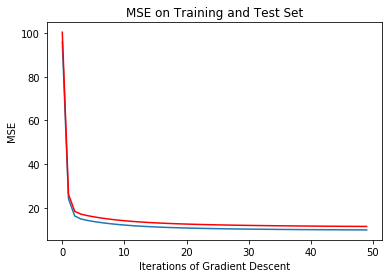

In [38]:
plt.plot(costs)
plt.plot(validation_costs, color="red")
plt.title(f"MSE on Training and Test Set")
plt.xlabel("Iterations of Gradient Descent")
plt.ylabel("MSE")